In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
# Data
models = ['T5-Base', 'Pegasus', 'Bart-Large', 'Fine-tuned Bart-Large']
rouge1 = [19.47, 21.84, 26.95, 53.33]
rouge2 = [4.41, 3.51, 7.24, 28.60]
rougeL = [15.75, 17.22, 21.28, 44.20]
rougeLsum = [15.77, 17.18, 21.28, 49.20]
bleu = [0.0, 0.0, 0.0, 0.0]
meteor = [0.176, 0.028, 0.195, 0.489]

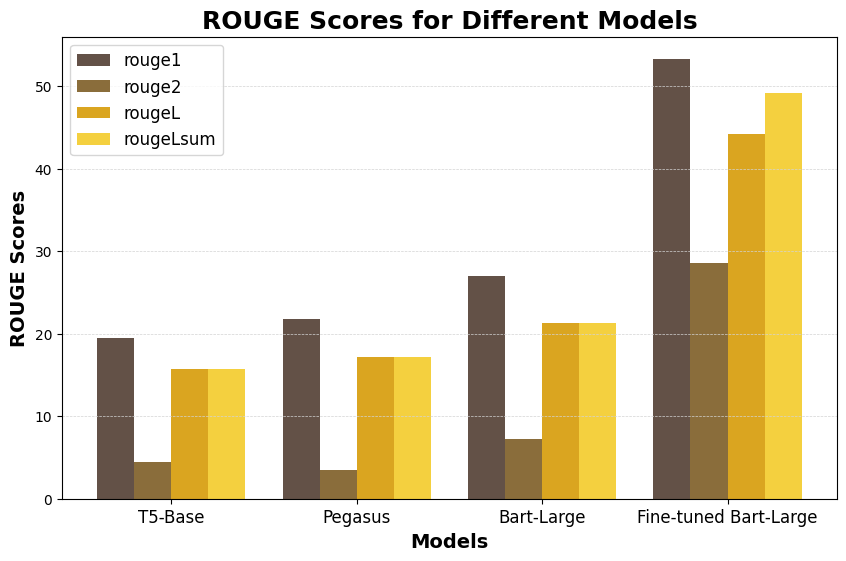

In [ ]:
# Define the color palette
colors = ['#635147', '#8A6D3B', '#DAA520', '#F4D03F']

# 1. Bar Chart for ROUGE Scores
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2
index = range(len(models))
ax.bar(index, rouge1, bar_width, color=colors[0], label='rouge1')
ax.bar([i + bar_width for i in index], rouge2, bar_width, color=colors[1], label='rouge2')
ax.bar([i + 2 * bar_width for i in index], rougeL, bar_width, color=colors[2], label='rougeL')
ax.bar([i + 3 * bar_width for i in index], rougeLsum, bar_width, color=colors[3], label='rougeLsum')
ax.set_xlabel('Models', fontsize=14, fontweight='bold')
ax.set_ylabel('ROUGE Scores', fontsize=14, fontweight='bold')
ax.set_title('ROUGE Scores for Different Models', fontsize=18, fontweight='bold')
ax.set_xticks([i + 1.5 * bar_width for i in index])
ax.set_xticklabels(models, fontsize=12)
ax.legend(fontsize=12)

# Add grid lines
ax.grid(axis='y', linestyle='--', linewidth=0.5, color='#D3D3D3')

# Set the y-axis limits
ax.set_ylim(bottom=0)

plt.show()

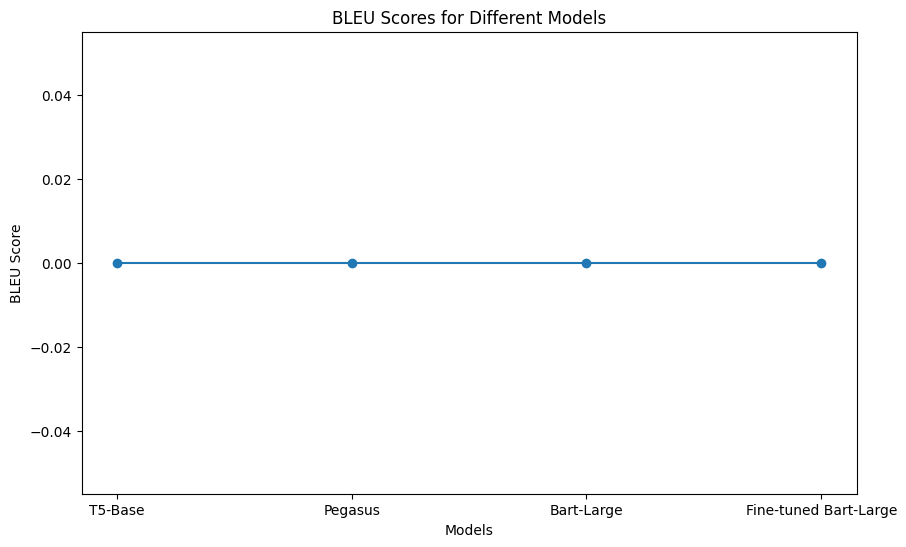

In [ ]:
# 2. Line Chart for BLEU Scores
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(models, bleu, marker='o')
ax.set_xlabel('Models')
ax.set_ylabel('BLEU Score')
ax.set_title('BLEU Scores for Different Models')
plt.show()

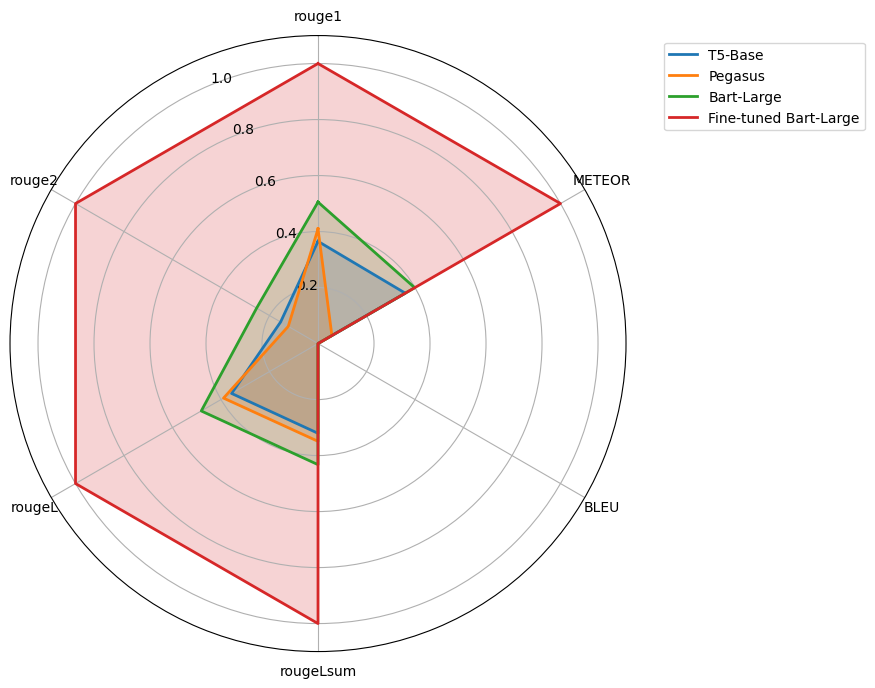

In [ ]:
# Normalize scores
max_scores = [max(rouge1) + 1e-6, max(rouge2) + 1e-6, max(rougeL) + 1e-6, max(rougeLsum) + 1e-6, max(bleu) + 1e-6, max(meteor) + 1e-6]
normalized_scores = []
for i in range(len(models)):
    model_scores = [rouge1[i] / max_scores[0], rouge2[i] / max_scores[1], rougeL[i] / max_scores[2],
                    rougeLsum[i] / max_scores[3], bleu[i] / max_scores[4], meteor[i] / max_scores[5]]
    normalized_scores.append(model_scores)

categories = ['rouge1', 'rouge2', 'rougeL', 'rougeLsum', 'BLEU', 'METEOR']
N = len(categories)

angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
ax.set_theta_offset(np.pi / 2)
ax.set_ylim(0, 1.1)

for i, model in enumerate(models):
    values = normalized_scores[i]
    values += values[:1]
    ax.plot(angles, values, label=model, linewidth=2)
    ax.fill(angles, values, alpha=0.2)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories)
ax.legend(loc='upper left', bbox_to_anchor=(1.05, 1))
plt.show()

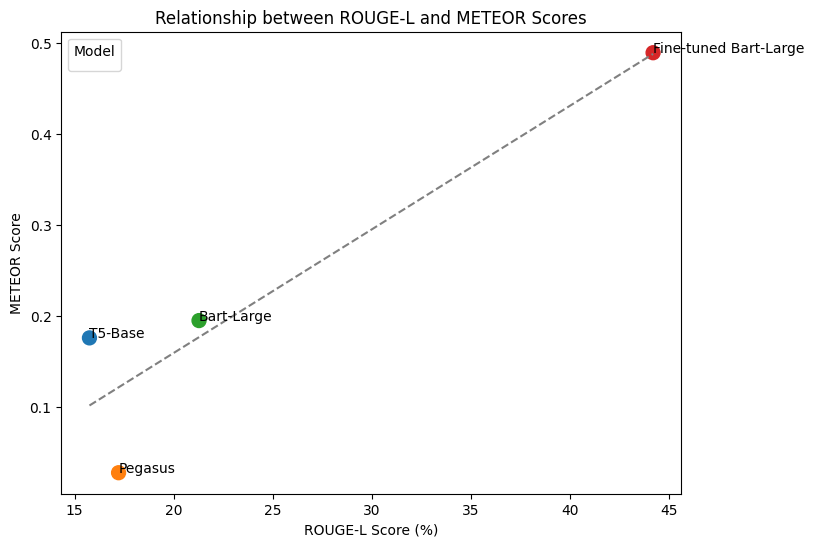

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Original data
models = ['T5-Base', 'Pegasus', 'Bart-Large', 'Fine-tuned Bart-Large']
rouge1 = [19.47, 21.84, 26.95, 53.33]
rouge2 = [4.41, 3.51, 7.24, 28.60]
rougeL = [15.75, 17.22, 21.28, 44.20]
rougeLsum = [15.77, 17.18, 21.28, 49.20]
bleu = [0.0, 0.0, 0.0, 0.0]
meteor = [0.176, 0.028, 0.195, 0.489]

# Create a dictionary that maps model names to colors
model_colors = {'T5-Base': 'tab:blue',
                'Pegasus': 'tab:orange',
                'Bart-Large': 'tab:green',
                'Fine-tuned Bart-Large': 'tab:red'}

fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(rougeL, meteor, s=100, c=[model_colors[model] for model in models])

# Add a label to each data point
for i, txt in enumerate(models):
    ax.annotate(txt, (rougeL[i], meteor[i]))

# Add a trendline
z = np.polyfit(rougeL, meteor, 1)
p = np.poly1d(z)
ax.plot(rougeL, p(rougeL), '--', color='gray')

# Format the plot
ax.set_xlabel('ROUGE-L Score (%)')
ax.set_ylabel('METEOR Score')
ax.set_title('Relationship between ROUGE-L and METEOR Scores')

# Add a legend
ax.legend(scatter.legend_elements()[0], models, title='Model')

plt.show()

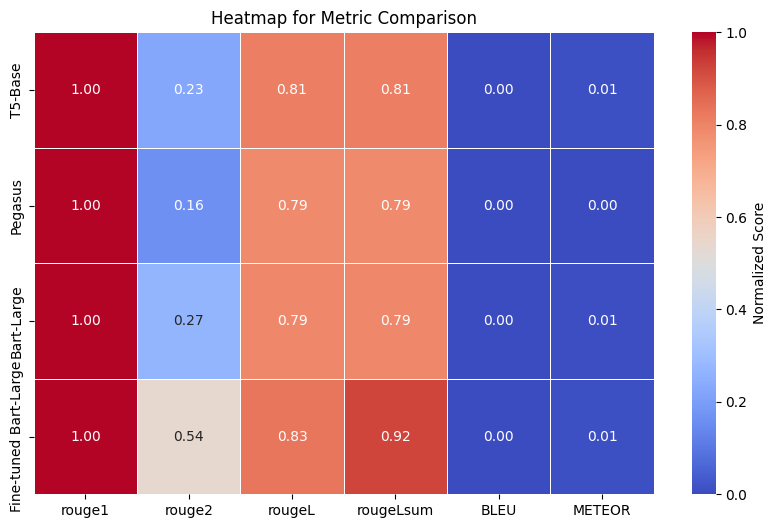

In [ ]:
# Original data
models = ['T5-Base', 'Pegasus', 'Bart-Large', 'Fine-tuned Bart-Large']
rouge1 = [19.47, 21.84, 26.95, 53.33]
rouge2 = [4.41, 3.51, 7.24, 28.60]
rougeL = [15.75, 17.22, 21.28, 44.20]
rougeLsum = [15.77, 17.18, 21.28, 49.20]
bleu = [0.0, 0.0, 0.0, 0.0]
meteor = [0.176, 0.028, 0.195, 0.489]

score_data = [rouge1, rouge2, rougeL, rougeLsum, bleu, meteor]
score_data = [list(score) for score in zip(*score_data)]
score_df = pd.DataFrame(score_data, columns=['rouge1', 'rouge2', 'rougeL', 'rougeLsum', 'BLEU', 'METEOR'], index=models)

# Normalize the scores in each column
normalized_data = []
for column in score_data:
    min_score = min(column)
    max_score = max(column)
    normalized_column = [(score - min_score) / (max_score - min_score) for score in column]
    normalized_data.append(normalized_column)

normalized_df = pd.DataFrame(normalized_data, columns=['rouge1', 'rouge2', 'rougeL', 'rougeLsum', 'BLEU', 'METEOR'], index=models)

fig, ax = plt.subplots(figsize=(10, 6))

# Modify the colormap
sns.heatmap(normalized_df, annot=True, fmt='.2f', cmap='coolwarm', linewidth=.5 , ax=ax, cbar_kws={'label': 'Normalized Score'})

ax.set_title('Heatmap for Metric Comparison')
plt.show()